## EXPERIMENT 1: MagFace

In [1]:
## Load libraries

import numpy as np
import cv2
from matplotlib import pyplot as plt
import torch
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import normalize
import sys
sns.set(style="white")
%matplotlib inline
sys.path.append('../../utils')
from Model_utils.Model_funcs import *
from Result_metric_utils.result_metrics import *
from Data_proc_utils.Data_proc_funcs import *
from DET_utils.DET_plots import *
from DET_utils.DET import *
from Plotting_stats_utils.plotting_threshold import *
from Plotting_stats_utils.stats_tables import *
from IPython import embed

from scipy.stats import describe, gaussian_kde
import math


In [2]:
# Save figures
from matplotlib import pyplot as plt
save_fig_path = '../../figures/mag_1_1/'


### MagFace Results

This notebook loads the feature vectors from MagFace and run them through the results metrics:
FNIR, FPIR, FND, FPD, and GARBE

# Load data

In [3]:
feature_list_children = '../../data/data_full/feature_vectors/magface_feature_vectors/1.1/feature_vectors_from_children_filtered_bibel_FINAL_INFERENCE_baseline_ex_1_1.list'
feature_list_adults = '../../data/data_full/feature_vectors/magface_feature_vectors/feature_vectors_from_adults_bibel_cropped_retina_all.list'

def load_and_compute_similarity(feature_list, dtype=np.float32):
    # Load data
    image_names, ids, num_ids, norm_feats = load_magface_vectors(feature_list)

    # Convert dtype to reduce memory usage
    norm_feats = norm_feats.astype(dtype)

    # Compute similarity matrix incrementally if possible
    sim_mat = np.dot(norm_feats, norm_feats.T)

    return image_names, ids, num_ids, sim_mat


In [4]:
# Load and compute for children
image_names_c, ids_c, num_ids_c, sim_mat_c = load_and_compute_similarity(feature_list_children)


/data/data_full/children_filtered_bibel_FINAL_INFERENCE/Indian_89/Indian_89_5.png
/data/data_full/children_filtered_bibel_FINAL_INFERENCE/Indian_89/Indian_89_1.png
/data/data_full/children_filtered_bibel_FINAL_INFERENCE/Indian_89/Indian_89_2.png
/data/data_full/children_filtered_bibel_FINAL_INFERENCE/Indian_m.04n3v0_/m.04n3v0__0002.jpg
/data/data_full/children_filtered_bibel_FINAL_INFERENCE/Asian_270/Asian_270_1.png
/data/data_full/children_filtered_bibel_FINAL_INFERENCE/Asian_270/Asian_270_3.png
/data/data_full/children_filtered_bibel_FINAL_INFERENCE/Asian_270/Asian_270_2.png
/data/data_full/children_filtered_bibel_FINAL_INFERENCE/Asian_344/Asian_344_19.png
/data/data_full/children_filtered_bibel_FINAL_INFERENCE/Asian_344/Asian_344_21.png
/data/data_full/children_filtered_bibel_FINAL_INFERENCE/Caucasian_167/Caucasian_167_26.png
/data/data_full/children_filtered_bibel_FINAL_INFERENCE/Caucasian_167/Caucasian_167_38.png
/data/data_full/children_filtered_bibel_FINAL_INFERENCE/Caucasian_16

In [5]:

# Load and compute for adults
image_names_a, ids_a, num_ids_a, sim_mat_a = load_and_compute_similarity(feature_list_adults)


/data/data_full/adults_filtered_bibel_cropped_resized_retina/Indian_m.02nrz2/m.02nrz2_0003.jpg
/data/data_full/adults_filtered_bibel_cropped_resized_retina/Indian_m.02nrz2/m.02nrz2_0001.jpg
/data/data_full/adults_filtered_bibel_cropped_resized_retina/Indian_m.02nrz2/m.02nrz2_0004.jpg
/data/data_full/adults_filtered_bibel_cropped_resized_retina/Indian_m.01241v/m.01241v_0002.jpg
/data/data_full/adults_filtered_bibel_cropped_resized_retina/African_m.05zn751/m.05zn751_0001.jpg
/data/data_full/adults_filtered_bibel_cropped_resized_retina/African_m.05zn751/m.05zn751_0002.jpg
/data/data_full/adults_filtered_bibel_cropped_resized_retina/African_m.05zn751/m.05zn751_0004.jpg
/data/data_full/adults_filtered_bibel_cropped_resized_retina/Indian_m.04n3v0_/m.04n3v0__0001.jpg
/data/data_full/adults_filtered_bibel_cropped_resized_retina/Indian_m.0kvkdqp/m.0kvkdqp_0001.jpg
/data/data_full/adults_filtered_bibel_cropped_resized_retina/Indian_m.0kvkdqp/m.0kvkdqp_0004.jpg
/data/data_full/adults_filtered_bib

In [6]:


# Dataframes with info, removes names not in magface results
children_all = pd.read_csv('../../data/image_info_csvs/final_filtered_children_df_BIBEL.csv')
children_all = children_all[children_all.image_name.isin(image_names_c)]

adults_all_org = pd.read_csv('../../data/image_info_csvs/final_filtered_adults_df_BIBEL.csv')
adults_all = adults_all_org[adults_all_org.image_name.isin(image_names_a)]

# Find the threshold

In [7]:
random_states = [1]
percentiles = np.arange(0, 1.0, 0.1).tolist()

df_all_threshold_x = compute_metrics_ex_1_1(random_states, percentiles, children_all, adults_all, image_names_c, image_names_a, sim_mat_c, sim_mat_a, num_ids_c, num_ids_a, ids_c, ids_a, balance_child_data, balance_adults_data_enrolled, compute_fnir, compute_fpir, GARBE)


len(sim_mat_c) 7571
len(sim_mat_c_enrolled_0) 2174
enrolled_sim_mat.shape[0]2174
enrolled_sim_mat.shape[1]2174
M_d_set_len2174
neg_ref0.6666666666666666
enrolled_sim_mat.shape[0]2063
enrolled_sim_mat.shape[1]2063
M_d_set_len2063
neg_ref0.6666666666666666
FPD result:  1.57776502385592
FND result:  1.0538047945025844
GARBE result, GARBE close to 1 means more unfair:  1.1847948518409184
Done for random_state: 1, percentile: 0.0
enrolled_sim_mat.shape[0]2174
enrolled_sim_mat.shape[1]2174
M_d_set_len2174
neg_ref1.0
enrolled_sim_mat.shape[0]2063
enrolled_sim_mat.shape[1]2063
M_d_set_len2063
neg_ref7.533333333333333
FPD result:  3.132109904249027
FND result:  7.938663648185258
GARBE result, GARBE close to 1 means more unfair:  6.737025212201201
Done for random_state: 1, percentile: 0.1
enrolled_sim_mat.shape[0]2174
enrolled_sim_mat.shape[1]2174
M_d_set_len2174
neg_ref6.733333333333333
enrolled_sim_mat.shape[0]2063
enrolled_sim_mat.shape[1]2063
M_d_set_len2063
neg_ref11.333333333333336
FPD res

In [8]:
def plot_threshold_metrics_ex_1_1_together_w_conf(df_all_threshold_x, title, save_fig_path):
    # Set the aesthetics for the plots
    sns.set(style="whitegrid")

    plot_df_mean = df_all_threshold_x.groupby('Threshold').mean()
    plot_df_std = df_all_threshold_x.groupby('Threshold').std()
    count = df_all_threshold_x.groupby('Threshold').size().values

    # Calculate the 95% confidence intervals
    ci_factor = 1.96
    plot_df_ci = plot_df_std / np.sqrt(count[:, None]) * ci_factor

    plt.figure(figsize=(12, 7))

    # Plot FNIR with confidence intervals
    plt.plot(plot_df_mean.index, plot_df_mean['FNIR_c'], color='#88E288', linestyle='-', label='Children - FNIR', linewidth=2.7)
    plt.fill_between(plot_df_mean.index, plot_df_mean['FNIR_c'] - plot_df_ci['FNIR_c'], plot_df_mean['FNIR_c'] + plot_df_ci['FNIR_c'], color='#88E288', alpha=0.3)
    plt.plot(plot_df_mean.index, plot_df_mean['FNIR_a'], color='#95DFFF', linestyle='-', label='Adults - FNIR', linewidth=2.7)
    plt.fill_between(plot_df_mean.index, plot_df_mean['FNIR_a'] - plot_df_ci['FNIR_a'], plot_df_mean['FNIR_a'] + plot_df_ci['FNIR_a'], color='#95DFFF', alpha=0.3)

    plt.xlabel('Threshold', fontsize=14)
    plt.ylabel('FNIR and FPIR', fontsize=14)
    # plt.title('FNIR vs Threshold', fontsize=16)
    plt.xlim(0.0, 1)
    plt.legend(fontsize=16)
    plt.grid(True)

    # Plot FPIR with confidence intervals
    plt.plot(plot_df_mean.index, plot_df_mean['FPIR_c'], color='#88E288', linestyle='--', label='Children - FPIR', linewidth=2.7)
    plt.fill_between(plot_df_mean.index, plot_df_mean['FPIR_c'] - plot_df_ci['FPIR_c'], plot_df_mean['FPIR_c'] + plot_df_ci['FPIR_c'], color='#88E288', alpha=0.3)
    plt.plot(plot_df_mean.index, plot_df_mean['FPIR_a'], color='#95DFFF', linestyle='--', label='Adults - FPIR', linewidth=2.7)
    plt.fill_between(plot_df_mean.index, plot_df_mean['FPIR_a'] - plot_df_ci['FPIR_a'], plot_df_mean['FPIR_a'] + plot_df_ci['FPIR_a'], color='#95DFFF', alpha=0.3)

    plt.xlabel('Threshold', fontsize=14)
    plt.ylabel('FPIR and FNIR', fontsize=14)
    # plt.title(f'FPIR and FNIR vs Threshold - {title}', fontsize=16)
    plt.xlim(0.0, 1)
    plt.legend(fontsize=16)
    plt.grid(True)

    plt.tight_layout()

    plt.savefig(f'{save_fig_path}TH.png')

    # Show the plot
    plt.show()

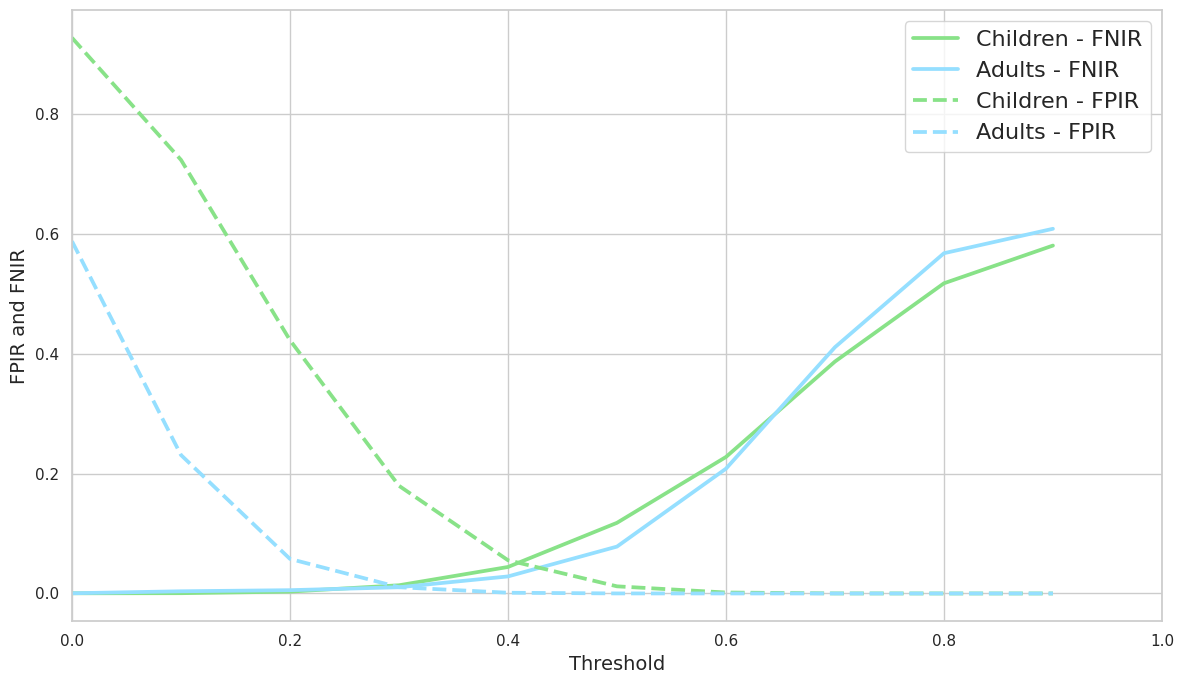

In [8]:

plot_threshold_metrics_ex_1_1_together_w_conf(df_all_threshold_x, 'MagFace ex. 1.1', save_fig_path)

In [11]:


def plot_threshold_metrics_ex_1_1_together_w_conf_zoomed(df_all_threshold_x, title, save_fig_path):
    # Set the aesthetics for the plots
    sns.set(style="whitegrid")

    plot_df_mean = df_all_threshold_x.groupby('Threshold').mean()
    plot_df_std = df_all_threshold_x.groupby('Threshold').std()
    count = df_all_threshold_x.groupby('Threshold').size().values

    # Calculate the 95% confidence intervals
    ci_factor = 1.96
    plot_df_ci = plot_df_std / np.sqrt(count[:, None]) * ci_factor

    plt.figure(figsize=(12, 7))

    # Plot FNIR with confidence intervals
    plt.plot(plot_df_mean.index, plot_df_mean['FNIR_c'], color='#88E288', linestyle='-', label='Children - FNIR', linewidth=2.7)
    plt.fill_between(plot_df_mean.index, plot_df_mean['FNIR_c'] - plot_df_ci['FNIR_c'], plot_df_mean['FNIR_c'] + plot_df_ci['FNIR_c'], color='#88E288', alpha=0.4)
    plt.plot(plot_df_mean.index, plot_df_mean['FNIR_a'], color='#95DFFF', linestyle='-', label='Adults - FNIR', linewidth=2.7)
    plt.fill_between(plot_df_mean.index, plot_df_mean['FNIR_a'] - plot_df_ci['FNIR_a'], plot_df_mean['FNIR_a'] + plot_df_ci['FNIR_a'], color='#95DFFF', alpha=0.4)

    plt.xlabel('Threshold', fontsize=14)
    plt.ylabel('FNIR and FPIR', fontsize=14)
    # plt.title('FNIR vs Threshold', fontsize=16)
    plt.xlim(0.28, 0.34)
    plt.ylim(0.02,0.06)
    plt.legend(fontsize=16)
    plt.grid(True)

    # Plot FPIR with confidence intervals
    plt.plot(plot_df_mean.index, plot_df_mean['FPIR_c'], color='#88E288', linestyle='--', label='Children - FPIR', linewidth=2.7)
    plt.fill_between(plot_df_mean.index, plot_df_mean['FPIR_c'] - plot_df_ci['FPIR_c'], plot_df_mean['FPIR_c'] + plot_df_ci['FPIR_c'], color='#88E288', alpha=0.4)
    plt.plot(plot_df_mean.index, plot_df_mean['FPIR_a'], color='#95DFFF', linestyle='--', label='Adults - FPIR', linewidth=2.7)
    plt.fill_between(plot_df_mean.index, plot_df_mean['FPIR_a'] - plot_df_ci['FPIR_a'], plot_df_mean['FPIR_a'] + plot_df_ci['FPIR_a'], color='#95DFFF', alpha=0.4)

    plt.xlabel('Threshold', fontsize=14)
    plt.ylabel('FPIR and FNIR', fontsize=14)
    # plt.title(f'FPIR and FNIR vs Threshold - {title}', fontsize=16)
    plt.xlim(0.28, 0.34)
    plt.ylim(0.02,0.06)
    plt.legend(fontsize=16)
    plt.grid(True)

    plt.tight_layout()
    # Show the plot
    plt.show()

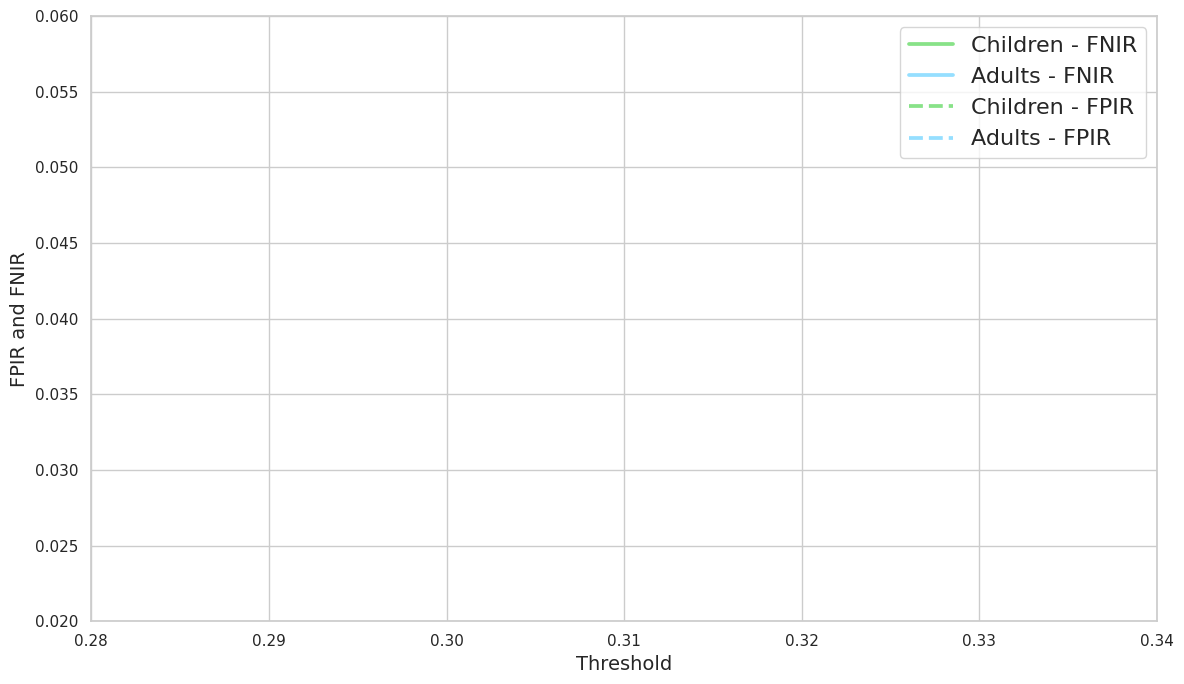

In [12]:
plot_threshold_metrics_ex_1_1_together_w_conf_zoomed(df_all_threshold_x, 'MagFace ex. 1.1', save_fig_path)

### the threshold should be 32

# Stats - 10 experiments

In [44]:


# # def remove_probeid_in_classification(arr, score_arr, probe_id, score_threshold=0.32):
# #     """
# #     Removes probe unique id and any comparison with a score larger than score_threshold in the array
# #     """
# #     filtered_indices = [i for i, v in enumerate(arr) if score_arr[i] <= score_threshold]
# #     return arr[filtered_indices]



# # def compute_fpir_2(non_enrolled_sim_score, num_ids_non_enrolled, num_ids_all, thold=0.32, score_threshold=0.35):
# #     """
# #     FPIR formula from ISO standard ISO/IEC 19795-1:2021
# #     """

# #     # U_D: set of non-mated identification transactions with reference database D. I.e. equal to number IDs with no enrolled ids.
# #     U_d_set_len = len(non_enrolled_sim_score)
# #     cand_list_returned = 0

# #     for i in range(U_d_set_len):
# #         probe = num_ids_non_enrolled[i] # probe corresponding to the current sample similarity matrix

# #         # for the non enrolled probe id, check if any of its similarity scores are above thold
# #         classified_pos_list = non_enrolled_sim_score[i] > thold
# #         classified_pos_idx = list(np.where(classified_pos_list)[0]) # get indexes where the score is above threshold
# #         face_idx_pos_class = num_ids_all[classified_pos_idx] # get numerical ids in the positive class
# #         similarity_scores = non_enrolled_sim_score[i][classified_pos_idx] # get similarity scores for the positive class
# #         # remove instance of probe id in classification list
# #         face_idx_pos_class_filtered = remove_probeid_in_classification(face_idx_pos_class, similarity_scores, probe, score_threshold)

# #         # if length of candidate list (filtered, i.e. without the probe itself) is greater than 0, count 1
# #         if len(face_idx_pos_class_filtered) > 0:
# #             cand_list_returned += 1

# #     fpir = cand_list_returned / 1036 #U_d_set_len

# #     return fpir


# # def compute_fpir_2(non_enrolled_sim_score, num_ids_non_enrolled, num_ids_all, thold=0.32):
# #     """
# #     FPIR formula from ISO standard ISO/IEC 19795-1:2021
# #     """

# #     # U_D: set of non-mated identification transactions with reference database D. I.e. equal to number IDs with no enrolled ids.
# #     U_d_set_len = len(non_enrolled_sim_score)
# #     cand_list_returned = 0

# #     for i in range(U_d_set_len):
# #         probe = num_ids_non_enrolled[i] # probe corresponding to the current sample similarity matrix

# #         # for the non enrolled probe id, check if any of its similarity scores are above thold
# #         classified_pos_list = non_enrolled_sim_score[i] > thold
# #         classified_pos_idx = list(np.where(classified_pos_list)[0]) # get indexes where the score is above threshold
# #         face_idx_pos_class = num_ids_all[classified_pos_idx] # get numerical ids in the positive class
# #         similarity_scores = non_enrolled_sim_score[i][classified_pos_idx] # get similarity scores for the positive class
# #         # remove instance of probe id and comparisons with scores above score_threshold
# #         face_idx_pos_class_filtered = remove_probeid_in_classification(face_idx_pos_class, similarity_scores, probe)

# #         # if length of candidate list (filtered, i.e. without the probe itself) is greater than 0, count 1
# #         if len(face_idx_pos_class_filtered) > 0:
# #             cand_list_returned += 1

# #     fpir = cand_list_returned / (non_enrolled_sim_score.shape[1]-1)#1036 # U_d_set_len

# #     return fpir


# def evaluate_metrics_ex_1_1(random_states, children_all, adults_all, image_names_c, image_names_a, sim_mat_c, sim_mat_a, num_ids_c, num_ids_a, ids_c, ids_a, balance_child_data, balance_adults_data_enrolled, compute_fnir, compute_fpir_2, GARBE, remove_ones, threshold_number, alpha_garbe=0.25):
#     sim_mat_dict_all = {}
#     FNIR_c_list = []
#     FNIR_a_list = []
#     FPIR_c_list = []
#     FPIR_a_list = []
#     FPD_list = []
#     FND_list = []
#     GARBE_list = []
#     threshold_list = []

#     for random_state_i in random_states:
#         ### Load children and adults balanced data ###
#         children_balanced_df_i = balance_child_data(children_all, print_stats=False, random_state=random_state_i)
#         adults_balanced_df_i = balance_adults_data_enrolled(children_balanced_df_i, adults_all, print_stats=False, random_state=random_state_i)

#         ### All reference image names, enrolled and non-enrolled image names - children ###
#         c_mates = children_balanced_df_i.groupby("identity_name").agg({'identity_name': ['count']})
#         enrolled_identity_names_c = c_mates[c_mates[('identity_name', 'count')] > 1].index
#         enrolled_image_names_c = list(children_balanced_df_i[children_balanced_df_i["identity_name"].isin(enrolled_identity_names_c)].image_name)
#         non_enrolled_identity_names_c = c_mates[c_mates[('identity_name', 'count')] == 1].index
#         non_enrolled_image_names_c = list(children_balanced_df_i[children_balanced_df_i["identity_name"].isin(non_enrolled_identity_names_c)].image_name)
#         all_reference_image_names_c = list(children_balanced_df_i.image_name)

#         ### All reference image names, enrolled and non-enrolled image names - adults ###
#         a_mates = adults_balanced_df_i.groupby("identity_name").agg({'identity_name': ['count']})
#         enrolled_identity_names_a = a_mates[a_mates[('identity_name', 'count')] > 1].index
#         enrolled_image_names_a = list(adults_balanced_df_i[adults_balanced_df_i["identity_name"].isin(enrolled_identity_names_a)].image_name)
#         non_enrolled_identity_names_a = a_mates[a_mates[('identity_name', 'count')] == 1].index
#         non_enrolled_image_names_a = list(adults_balanced_df_i[adults_balanced_df_i["identity_name"].isin(non_enrolled_identity_names_a)].image_name)
#         all_reference_image_names_a = list(adults_balanced_df_i.image_name)

#         ### Similarity matrices for ids in reference database ###
#         indices_c_all_reference = [image_names_c.index(name) for name in all_reference_image_names_c if image_names_c.index(name) < sim_mat_c.shape[1]]
#         indices_a_all_reference = [image_names_a.index(name) for name in all_reference_image_names_a if image_names_a.index(name) < sim_mat_a.shape[1]]

#         # Extract corresponding columns from the similarity matrix
#         sim_mat_c_reference_cols = sim_mat_c[:, indices_c_all_reference]
#         sim_mat_a_reference_cols = sim_mat_a[:, indices_a_all_reference]

#         print(f'len(sim_mat_c) {len(sim_mat_c)}')
#         print(f'len(sim_mat_c_reference_cols) {len(sim_mat_c_reference_cols)}')

#         # Extract corresponding rows from the numerical ids
#         num_ids_c_reference = num_ids_c[indices_c_all_reference]
#         num_ids_a_reference = num_ids_a[indices_a_all_reference]

#         ### Similarity matrices for non-enrolled ids ###
#         indices_c_non_enrolled = [image_names_c.index(name) for name in non_enrolled_image_names_c if image_names_c.index(name) < sim_mat_c.shape[0]]
#         indices_a_non_enrolled = [image_names_a.index(name) for name in non_enrolled_image_names_a if image_names_a.index(name) < sim_mat_a.shape[0]]

#         sim_mat_c_non_enrolled_0 = sim_mat_c_reference_cols[indices_c_non_enrolled]
#         sim_mat_a_non_enrolled_0 = sim_mat_a_reference_cols[indices_a_non_enrolled]

#         num_ids_c_non_enrolled = num_ids_c[indices_c_non_enrolled]
#         num_ids_a_non_enrolled = num_ids_a[indices_a_non_enrolled]

#         ### Similarity matrices for enrolled ids ###
#         indices_c_enrolled = [image_names_c.index(name) for name in enrolled_image_names_c if image_names_c.index(name) < sim_mat_c.shape[0]]
#         indices_a_enrolled = [image_names_a.index(name) for name in enrolled_image_names_a if image_names_a.index(name) < sim_mat_a.shape[0]]

#         sim_mat_c_enrolled_0 = sim_mat_c[np.ix_(indices_c_enrolled, indices_c_enrolled)]
#         print(f'len(sim_mat_c) {len(sim_mat_c)}')
#         print(f'len(sim_mat_c_enrolled_0) {len(sim_mat_c_enrolled_0)}')
#         sim_mat_a_enrolled_0 = sim_mat_a[np.ix_(indices_a_enrolled, indices_a_enrolled)]

#         num_ids_c_enrolled = num_ids_c[indices_c_enrolled]
#         num_ids_a_enrolled = num_ids_a[indices_a_enrolled]

#         thold = threshold_number


#         ### Evaluation metrics ###
#         # FNIR
#         FNIR_c, sim_mat_c_enrolled = compute_fnir(sim_mat_c_enrolled_0, sim_mat_c, enrolled_identity_names_c, num_ids_c_enrolled, ids_c, thold=threshold_number)
#         FNIR_a, sim_mat_a_enrolled = compute_fnir(sim_mat_a_enrolled_0, sim_mat_a, enrolled_identity_names_a, num_ids_a_enrolled, ids_a, thold=threshold_number)
#         # FPIR

#         print(f'len(children_all){len(children_all)}')
#         print(f'len(sim_mat_c_non_enrolled_0) {len(sim_mat_c_non_enrolled_0)}')
#         print(f'len(num_ids_c_non_enrolled) {len(num_ids_c_non_enrolled)}')
#         print(f'len(num_ids_c_reference) {len(num_ids_c_reference)}')


#         FPIR_c = compute_fpir_2(sim_mat_c_non_enrolled_0, num_ids_c_non_enrolled, num_ids_c_reference, thold=threshold_number)
#         FPIR_a = compute_fpir_2(sim_mat_a_non_enrolled_0, num_ids_a_non_enrolled, num_ids_a_reference, thold=threshold_number)

#         FPD_i, FND_i, GARBE_i = GARBE(FNIR_c, FNIR_a, FPIR_c, FPIR_a, alpha=alpha_garbe)

#         FNIR_c_list.append(FNIR_c)
#         FNIR_a_list.append(FNIR_a)
#         FPIR_c_list.append(FPIR_c)
#         FPIR_a_list.append(FPIR_a)
#         FPD_list.append(FPD_i)
#         FND_list.append(FND_i)
#         GARBE_list.append(GARBE_i)
#         threshold_list.append(thold)

#         sim_mat_dict_all[f'sim_mat_c_enrolled_iteration_{random_state_i}'] = sim_mat_c_enrolled
#         sim_mat_dict_all[f'sim_mat_a_enrolled_iteration_{random_state_i}'] = sim_mat_a_enrolled
#         sim_mat_dict_all[f'sim_mat_c_non_enrolled_iteration_{random_state_i}'] = remove_ones(sim_mat_c_non_enrolled_0)
#         sim_mat_dict_all[f'sim_mat_a_non_enrolled_iteration_{random_state_i}'] = remove_ones(sim_mat_a_non_enrolled_0)

#         print("done")

#     data = {
#         'Iteration': random_states,
#         'FNIR_c': FNIR_c_list,
#         'FNIR_a': FNIR_a_list,
#         'FPIR_c': FPIR_c_list,
#         'FPIR_a': FPIR_a_list,
#         'FPD': FPD_list,
#         'FND': FND_list,
#         'GARBE': GARBE_list,
#         'Threshold': threshold_list
#         }
#     df_all_results = pd.DataFrame(data)
#     return df_all_results, sim_mat_dict_all

In [11]:

random_states = [1,2,3]#, 3, 4, 5, 6, 7, 8, 9, 10]

df_all_results, sim_mat_dict_all_magface_ex1_1 = evaluate_metrics_ex_1_1(
    random_states, children_all, adults_all, image_names_c, image_names_a,
    sim_mat_c, sim_mat_a, num_ids_c, num_ids_a, ids_c, ids_a, balance_child_data,
    balance_adults_data_enrolled, compute_fnir, compute_fpir, GARBE, remove_ones, df_all_threshold_x[df_all_threshold_x.FNIR_c <0.05].Threshold.max()
)


len(sim_mat_c) 7571
len(sim_mat_c_reference_cols) 7571
len(sim_mat_c) 7571
len(sim_mat_c_enrolled_0) 2174
enrolled_sim_mat.shape[0]2174
enrolled_sim_mat.shape[1]2174
M_d_set_len2174
neg_ref96.13333333333331
enrolled_sim_mat.shape[0]2063
enrolled_sim_mat.shape[1]2063
M_d_set_len2063
neg_ref58.70000000000005
len(children_all)7817
len(sim_mat_c_non_enrolled_0) 2174
len(num_ids_c_non_enrolled) 2174
len(num_ids_c_reference) 3210
FPD result:  45.90536836213004
FND result:  1.5540879275569248
GARBE result, GARBE close to 1 means more unfair:  12.641908036200205
done
len(sim_mat_c) 7571
len(sim_mat_c_reference_cols) 7571
len(sim_mat_c) 7571
len(sim_mat_c_enrolled_0) 2181
enrolled_sim_mat.shape[0]2181
enrolled_sim_mat.shape[1]2181
M_d_set_len2181
neg_ref86.10079365079368
enrolled_sim_mat.shape[0]2113
enrolled_sim_mat.shape[1]2113
M_d_set_len2113
neg_ref47.433333333333344
len(children_all)7817
len(sim_mat_c_non_enrolled_0) 2181
len(num_ids_c_non_enrolled) 2181
len(num_ids_c_reference) 3210
FPD r

In [46]:
# FPIR_c = compute_fpir(sim_mat_c_non_enrolled_0, num_ids_c_non_enrolled, num_ids_c_reference, thold=threshold_number)


In [12]:
df_all_results

,Iteration,FNIR_c,FNIR_a,FPIR_c,FPIR_a,FPD,FND,GARBE,Threshold
0,1,0.044220,0.028454,0.055481,0.001209,45.905368,1.554088,12.641908,0.4
1,2,0.039478,0.022448,0.053087,0.001233,43.057057,1.758601,12.083215,0.4
2,3,0.042101,0.021311,0.053859,0.001311,41.082642,1.975525,11.752304,0.4


In [15]:
# Generate the LaTeX table
latex_table = generate_latex_table(df_all_results.applymap(lambda x: f"{x:.3f}").drop(columns='Iteration'))
print(latex_table)


\begin{table}
\caption{Descriptive Statistics} 
\label{table:descriptive_stats} 
\begin{tabular}{ccccccccc} 
\toprule
\textbf{{Iter.}} & $FNIR_c$ & $FNIR_a$ & $FPIR_c$ & $FPIR_a$ & $FPD$ & $FND$ & $GARBE$ & $T$ \\
\midrule
\textbf{0} & 0.044 & 0.028 & 0.055 & 0.001 & 45.905 & 1.554 & 12.642 & 0.400 \\
\textbf{1} & 0.039 & 0.022 & 0.053 & 0.001 & 43.057 & 1.759 & 12.083 & 0.400 \\
\textbf{2} & 0.042 & 0.021 & 0.054 & 0.001 & 41.083 & 1.976 & 11.752 & 0.400 \\
\bottomrule
\end{tabular} 
\end{table}



/tmp/ipykernel_161626/3719310588.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  latex_table = generate_latex_table(df_all_results.applymap(lambda x: f"{x:.3f}").drop(columns='Iteration'))


In [16]:
latex_table = generate_latex_table(df_all_results.describe().applymap(lambda x: f"{x:.3f}").drop(columns='Iteration'))
print(latex_table)

\begin{table}
\caption{Descriptive Statistics} 
\label{table:descriptive_stats} 
\begin{tabular}{ccccccccc} 
\toprule
\textbf{{Iter.}} & $FNIR_c$ & $FNIR_a$ & $FPIR_c$ & $FPIR_a$ & $FPD$ & $FND$ & $GARBE$ & $T$ \\
\midrule
\textbf{count} & 3.000 & 3.000 & 3.000 & 3.000 & 3.000 & 3.000 & 3.000 & 3.000 \\
\textbf{mean} & 0.042 & 0.024 & 0.054 & 0.001 & 43.348 & 1.763 & 12.159 & 0.400 \\
\textbf{std} & 0.002 & 0.004 & 0.001 & 0.000 & 2.425 & 0.211 & 0.450 & 0.000 \\
\textbf{min} & 0.039 & 0.021 & 0.053 & 0.001 & 41.083 & 1.554 & 11.752 & 0.400 \\
\textbf{25%} & 0.041 & 0.022 & 0.053 & 0.001 & 42.070 & 1.656 & 11.918 & 0.400 \\
\textbf{50%} & 0.042 & 0.022 & 0.054 & 0.001 & 43.057 & 1.759 & 12.083 & 0.400 \\
\textbf{75%} & 0.043 & 0.025 & 0.055 & 0.001 & 44.481 & 1.867 & 12.363 & 0.400 \\
\textbf{max} & 0.044 & 0.028 & 0.055 & 0.001 & 45.905 & 1.976 & 12.642 & 0.400 \\
\bottomrule
\end{tabular} 
\end{table}



/tmp/ipykernel_161626/2945641856.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  latex_table = generate_latex_table(df_all_results.describe().applymap(lambda x: f"{x:.3f}").drop(columns='Iteration'))


In [17]:
df_all_results.to_csv('df_all_results_mag_1_1.csv', index=False)


# Stats

In [18]:
import scipy.stats as stats
t_statistic, p_value = stats.ttest_rel(df_all_results['FNIR_c'], df_all_results['FNIR_a'])

# Output the results
print(f'T-statistic: {t_statistic}')
print(f'P-value: {p_value}')

T-statistic: 11.838279492323219
P-value: 0.007059998474978663


# Gemmer simscores

In [19]:
df_all_results.to_csv('results_10_experiment_1_1_magface.csv')

In [20]:
def concatenate_and_save_arrays(sim_mat_dict_all_magface_ex1_1, prefix, output_filename, iterations=10):
    # List to hold all the arrays
    iterations_list = []

    # Loop to access each array and append it to the list
    for i in range(1, iterations + 1):
        key = f'{prefix}_iteration_{i}'
        if key in sim_mat_dict_all_magface_ex1_1:
            iterations_list.append(sim_mat_dict_all_magface_ex1_1[key])

    # Concatenate all arrays into one big array
    all_iterations_array = np.concatenate(iterations_list)
    all_iterations_df = pd.DataFrame(all_iterations_array)

    # Save to CSV
    all_iterations_df.to_csv(output_filename, index=False)

    # Print the length of the big array
    print(len(all_iterations_df))

# Example usage
concatenate_and_save_arrays(sim_mat_dict_all_magface_ex1_1, 'sim_mat_c_enrolled', 'sim_mat_c_enrolled_iterations_all.csv')
concatenate_and_save_arrays(sim_mat_dict_all_magface_ex1_1, 'sim_mat_a_enrolled', 'sim_mat_a_enrolled_iterations_all.csv')
concatenate_and_save_arrays(sim_mat_dict_all_magface_ex1_1, 'sim_mat_c_non_enrolled', 'sim_mat_c_non_enrolled_iterations_all.csv')
concatenate_and_save_arrays(sim_mat_dict_all_magface_ex1_1, 'sim_mat_a_non_enrolled', 'sim_mat_a_non_enrolled_iterations_all.csv')


37468
12070
9822749
9617861


# Loading pre-saved stuff

In [21]:
sim_mat_c_enrolled_iterations_all = (pd.read_csv('sim_mat_c_enrolled_iterations_all.csv')).values.flatten()
sim_mat_a_enrolled_iterations_all = (pd.read_csv('sim_mat_a_enrolled_iterations_all.csv')).values.flatten()
sim_mat_c_non_enrolled_iterations_all = (pd.read_csv('sim_mat_c_non_enrolled_iterations_all.csv')).values.flatten()
sim_mat_a_non_enrolled_iterations_all = (pd.read_csv('sim_mat_a_non_enrolled_iterations_all.csv')).values.flatten()


In [22]:

def descriptive_statistics(mated_scores, nonmated_scores):
    stats_labels = ["Observations", "Minimum", "Maximum", "Mean", "St. Dev.", "Skewness", "Ex. Kurtosis"]
    mated_stats = describe(mated_scores)
    mated_stats = [mated_stats.nobs, mated_stats.minmax[0], mated_stats.minmax[1], mated_stats.mean, math.sqrt(mated_stats.variance), mated_stats.skewness, mated_stats.kurtosis]
    nonmated_stats = describe(nonmated_scores)
    nonmated_stats = [nonmated_stats.nobs, nonmated_stats.minmax[0], nonmated_stats.minmax[1], nonmated_stats.mean, math.sqrt(nonmated_stats.variance), nonmated_stats.skewness, nonmated_stats.kurtosis]

    stats_system_df = pd.DataFrame(np.array([stats_labels, mated_stats, nonmated_stats]).T, columns=["Statistic", "Mated", "Non-mated"])
    stats_system_df = stats_system_df.astype({"Statistic": str, "Mated": float, "Non-mated": float})
    return stats_system_df

In [23]:
mated_scores1 = sim_mat_a_enrolled_iterations_all
nonmated_scores1 = sim_mat_a_non_enrolled_iterations_all
scores_type1 = "similarity"
stats_system1_df = descriptive_statistics(mated_scores1, nonmated_scores1)
display(stats_system1_df)

,Statistic,Mated,Non-mated
0,Observations,12070.000000,9.617861e+06
1,Minimum,-0.080124,-4.764143e-01
2,Maximum,0.937999,9.116261e-01
3,Mean,0.639184,2.722594e-02
4,St. Dev.,0.129236,1.060196e-01
5,Skewness,-0.964637,2.930901e-01
6,Ex. Kurtosis,2.635040,3.250404e-01


In [24]:
mated_scores2 = sim_mat_c_enrolled_iterations_all
nonmated_scores2 = sim_mat_c_non_enrolled_iterations_all
scores_type2 = "similarity"
stats_system2_df = descriptive_statistics(mated_scores2, nonmated_scores2)
display(stats_system2_df)

,Statistic,Mated,Non-mated
0,Observations,37468.000000,9.822749e+06
1,Minimum,-0.023164,-3.376195e-01
2,Maximum,0.996555,9.998632e-01
3,Mean,0.634599,1.810775e-01
4,St. Dev.,0.140400,1.294906e-01
5,Skewness,-0.441522,2.756812e-01
6,Ex. Kurtosis,0.304807,3.526430e-02


In [25]:
mated_colour = "green"
mated_label = "Mated scores"
nonmated_colour = "red"
nonmated_label = "Non-mated scores"

figure_size = (12,6)
alpha_shade = 0.25
alpha_fill = 1.0
linewidth = 2
legend_loc = "upper left"
legend_anchor = (1.0, 1.02)
legend_cols = 1
legend_fontsize = 16
label_fontsize = 20

threshold_colour = "black"
threshold_style = "--"
round_digits = 5
sns.set(style="white", palette="muted", color_codes=True)
plt.rc("axes", axisbelow=True)

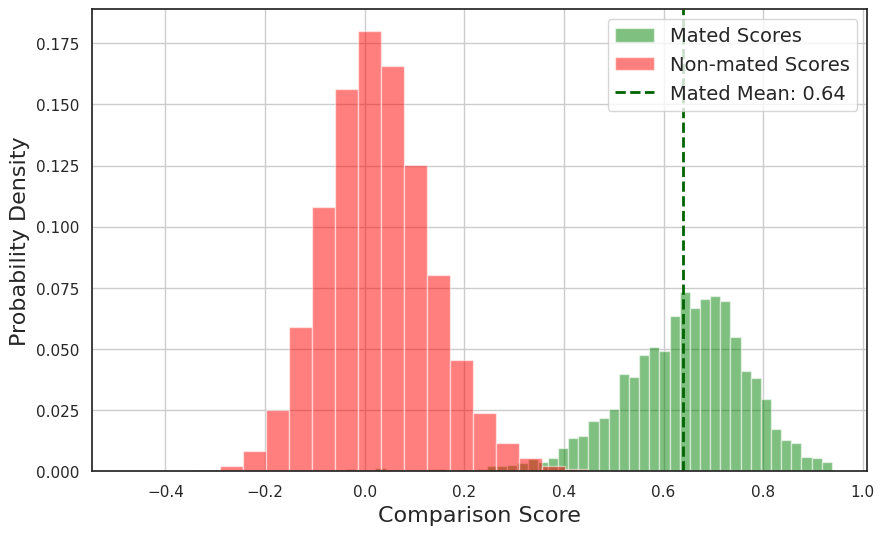

In [26]:


# def plot_histogram(mated_scores, nonmated_scores, normalise=True, savename=None, title="Histogram", save_fig_path="save_fig_path", gem_som = 'A1'):
#     def normalise_scores(distribution):
#         return np.ones_like(distribution) / len(distribution)

#     mated_mean = np.mean(mated_scores)

#     plt.figure(figsize=(10, 6))

#     if normalise:
#         plt.hist(mated_scores, bins=50, weights=normalise_scores(mated_scores), color='green', alpha=0.5, label='Mated Scores')
#         plt.hist(nonmated_scores, bins=30, weights=normalise_scores(nonmated_scores), color='red', alpha=0.5, label='Non-mated Scores')
#         ylabel = "Probability Density"
#     else:
#         plt.hist(mated_scores, bins=50, color='green', alpha=0.5, label='Mated Scores')
#         plt.hist(nonmated_scores, bins=30, color='red', alpha=0.5, label='Non-mated Scores')
#         ylabel = "Count"

#     plt.axvline(mated_mean, color='darkgreen', linestyle='--', linewidth=2, label=f'Mated Mean: {mated_mean:.2f}')

#     plt.xlabel("Comparison Score", size=16)
#     plt.ylabel(ylabel, size=16)
#     plt.title(title, size=20)
#     plt.grid(True)
#     plt.legend(loc='upper right', bbox_to_anchor=(1, 1), ncol=1, fontsize=14)  # Adjust legend parameters as needed

#     plt.savefig(f'{save_fig_path}{gem_som}.png')

#     plt.show()

plot_histogram(mated_scores1, nonmated_scores1, normalise=True, title = 'Adults - MagFace ex. 1.1 ', save_fig_path=save_fig_path, gem_som = 'A1')


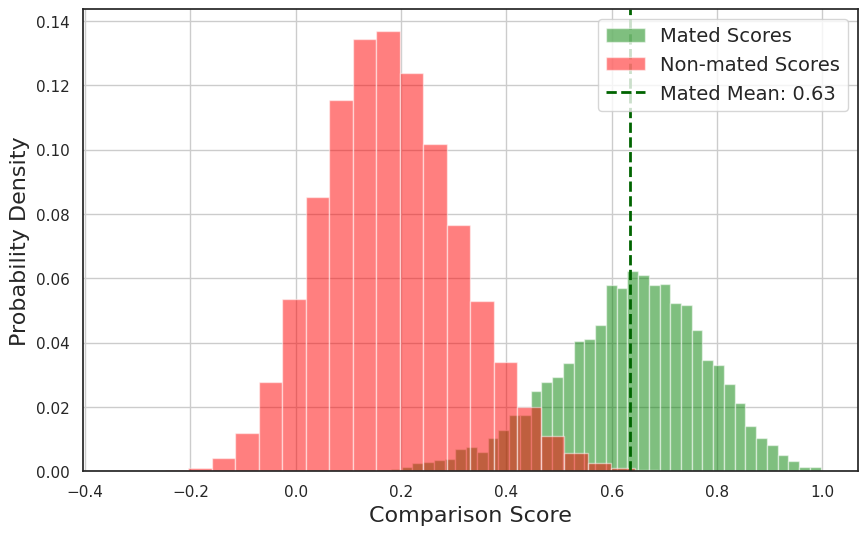

In [27]:
plot_histogram(mated_scores2, nonmated_scores2, normalise=True, title = 'Children - MagFace ex. 1.1 ', save_fig_path=save_fig_path, gem_som='C1')


# DET curves

In [28]:
d_prime_system1 = d_prime(mated_scores1, nonmated_scores1)
print("d' child =", round(d_prime_system1, round_digits))

d_prime_system2 = d_prime(mated_scores2, nonmated_scores2)
print("d' adult =", round(d_prime_system2, round_digits))


d' child = 5.17749
d' adult = 3.35805


In [29]:

def kde_with_threshold(mated_scores, nonmated_scores, scores_type, threshold, savename=None, save_fig_path='save_fig_path', title='title'):
    linspace_items = 101
    mated_kde, mated_pos, mated_min, mated_max = get_kde(mated_scores, linspace_items)
    nonmated_kde, nonmated_pos, nonmated_min, nonmated_max = get_kde(nonmated_scores, linspace_items)

    plt.figure(figsize=figure_size)
    plt.xlabel("Comparison Score", size=label_fontsize)
    plt.ylabel("Probability Density", size=label_fontsize)

    def compute_fills(scores_type, mated_min, mated_max, nonmated_min, nonmated_max, linspace_items):
        if scores_type == "similarity":
            if mated_min < threshold:
                mated_shade = np.linspace(threshold, mated_max, linspace_items)
                mated_fill = np.linspace(mated_min, threshold, linspace_items)
            else:
                mated_shade = np.linspace(mated_min, mated_max, linspace_items)
                mated_fill = None
            if nonmated_max > threshold:
                nonmated_shade = np.linspace(nonmated_min, threshold, linspace_items)
                nonmated_fill = np.linspace(threshold, nonmated_max, linspace_items)
            else:
                nonmated_shade = np.linspace(nonmated_min, nonmated_max, linspace_items)
                nonmated_fill = None
        elif scores_type == "dissimilarity":
            if mated_max > threshold:
                mated_shade = np.linspace(mated_min, threshold, linspace_items)
                mated_fill = np.linspace(threshold, mated_max, linspace_items)
            else:
                mated_shade = np.linspace(mated_min, mated_max, linspace_items)
                mated_fill = None
            if nonmated_min < threshold:
                nonmated_shade = np.linspace(threshold, nonmated_max, linspace_items)
                nonmated_fill = np.linspace(nonmated_min, threshold, linspace_items)
            else:
                nonmated_shade = np.linspace(nonmated_min, nonmated_max, linspace_items)
                nonmated_fill = None
        else:
            raise ValueError(f"Unknown type of comparison scores: {scores_type}")
        return mated_shade, mated_fill, nonmated_shade, nonmated_fill

    plt.plot(mated_pos, mated_kde(mated_pos), linewidth=linewidth, color=mated_colour, label=mated_label)
    plt.plot(nonmated_pos, nonmated_kde(nonmated_pos), linewidth=linewidth, color=nonmated_colour, label=nonmated_label)

    mated_shade, mated_fill, nonmated_shade, nonmated_fill = compute_fills(scores_type, mated_min, mated_max, nonmated_min, nonmated_max, linspace_items)

    plt.fill_between(mated_shade, mated_kde(mated_shade), alpha=alpha_shade, color=mated_colour)
    plt.fill_between(nonmated_shade, nonmated_kde(nonmated_shade), alpha=alpha_shade, color=nonmated_colour)

    if mated_fill is not None:
        plt.fill_between(mated_fill, mated_kde(mated_fill), alpha=alpha_fill, color=mated_colour)
    if nonmated_fill is not None:
        plt.fill_between(nonmated_fill, nonmated_kde(nonmated_fill), alpha=alpha_fill, color=nonmated_colour)

    plt.axvline(threshold, linewidth=linewidth, linestyle=threshold_style, color=threshold_colour, label="Decision th")

    plt.legend(loc=0)
    red_patch = mpatches.Patch(color=nonmated_colour, alpha=alpha_fill, label='False positives')
    green_patch = mpatches.Patch(color=mated_colour, alpha=alpha_fill, label='False negatives')
    shaded_red_patch = mpatches.Patch(color=nonmated_colour, alpha=alpha_shade, label='True negatives')
    shaded_green_patch = mpatches.Patch(color=mated_colour, alpha=alpha_shade, label='True positives')
    current_handles, _ = plt.gca().get_legend_handles_labels()

    plt.grid(True)
    plt.legend(loc='upper right', bbox_to_anchor=legend_anchor, ncol=legend_cols, fontsize=legend_fontsize, handles=[green_patch, red_patch, shaded_green_patch, shaded_red_patch]+current_handles)
    plt.xlim(-0.1, 1)
    plt.ylim(0, None)
    plt.xticks(fontsize=tick_fontsize)
    plt.yticks(fontsize=tick_fontsize)

    plt.savefig(f'{save_fig_path}{title}_FN_FP.png')

    if savename is not None:
        plt.savefig(savename, bbox_inches="tight")
        plt.cla()
        plt.clf()
        plt.close()
    else:
        plt.show()

    # Calculate and print false negatives percentage
    false_negatives = np.sum(mated_scores < threshold)
    false_negatives_percentage = (false_negatives / len(mated_scores)) * 100
    print(f"False Negatives: {false_negatives_percentage:.2f}%")


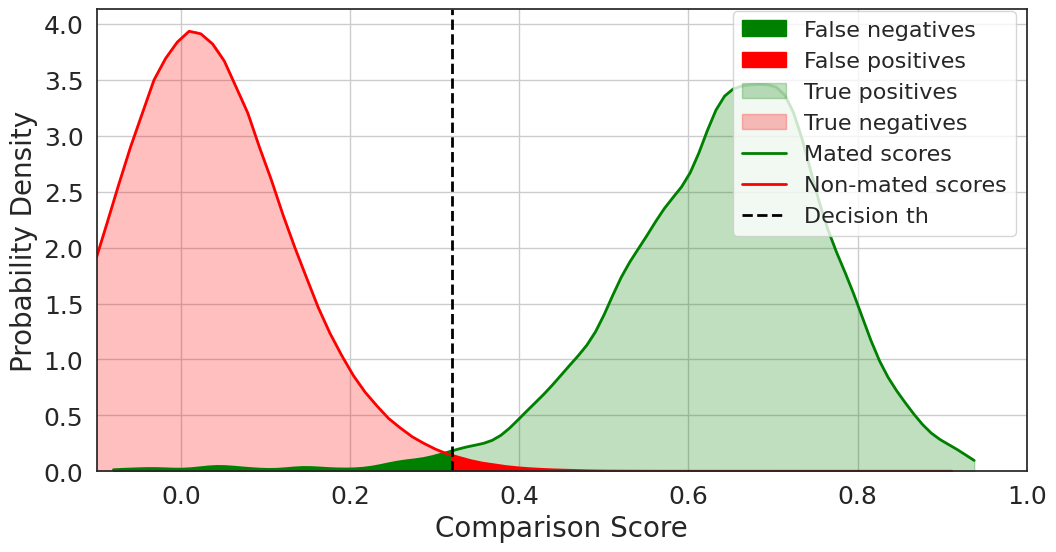

False Negatives: 1.71%


In [30]:
# threshold1 = df_all_threshold_x[df_all_threshold_x.FNIR_c <=0.05].Threshold.max()
threshold1 = 0.4
kde_with_threshold(mated_scores1, nonmated_scores1, scores_type1, threshold1, save_fig_path=save_fig_path, title='A2')

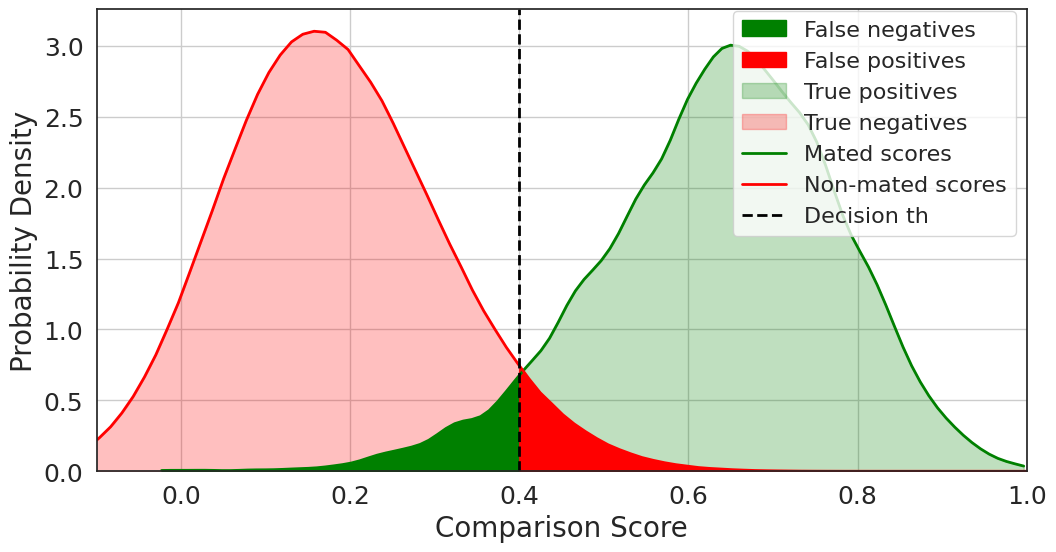

False Negatives: 5.68%


In [31]:
# threshold2 = df_all_threshold_x[df_all_threshold_x.FNIR_c <0.05].Threshold.max()
threshold2 = 0.40
kde_with_threshold(mated_scores2, nonmated_scores2, scores_type2, threshold2, save_fig_path=save_fig_path, title='C2')

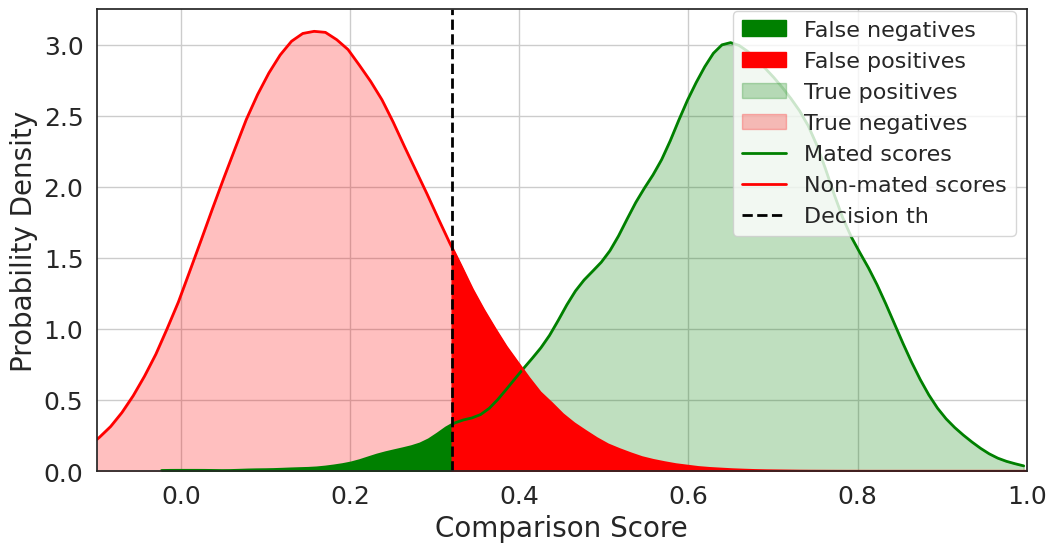

False Negatives: 2.27%


In [44]:
threshold2 = 0.32
kde_with_threshold(mated_scores2, nonmated_scores2, scores_type2, threshold2, save_fig_path=save_fig_path, title='C2')

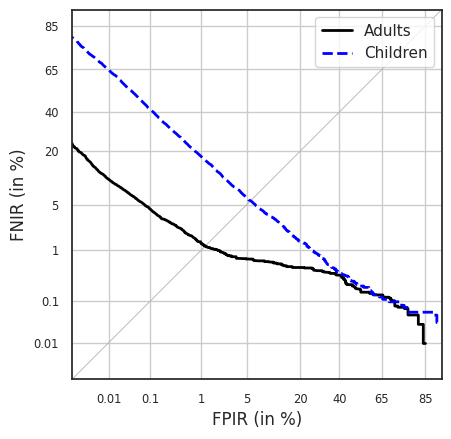

In [28]:


# def DET_plotting_1_1(mated_scores1, mated_scores2,nonmated_scores1, nonmated_scores2, score_type= "similarity",title = 'Adults vs Children - MagFace ex. 2.2', save_fig_path= 'save_fig_path'):
#     figure_size = (12,7)
#     alpha_shade = 0.25
#     alpha_fill = 1.0
#     linewidth = 2
#     legend_loc = "upper left"
#     legend_anchor = (1.0, 1.02)
#     legend_cols = 1
#     legend_fontsize = 18
#     label_fontsize = 18
#     tick_fontsize = 18
#     system_name1 = 'Adults'
#     system_name2 = 'Children'

#     det = DET(biometric_evaluation_type='identification', abbreviate_axes=True, plot_eer_line=True)#, plot_title=title)
#     det.x_limits = np.array([1e-5, .8])
#     det.y_limits = np.array([1e-5, .8])
#     det.x_ticks = np.array([1e-4, 1e-3, 1e-2, 5e-2, 20e-2, 40e-2, 80e-2])
#     det.x_ticklabels = np.array(['0.01','0.1', '1', '5', '20', '40', '80'])
#     det.y_ticks = np.array([1e-4, 1e-3, 1e-2, 5e-2, 20e-2, 40e-2, 80e-2])
#     det.y_ticklabels = np.array(['0.01','0.1', '1', '5', '20', '40', '80'])
#     det.create_figure()
#     det.plot(tar=adjust_scores_for_DET(mated_scores1, scores_type1), non=adjust_scores_for_DET(nonmated_scores1, scores_type1), label=system_name1)
#     det.plot(tar=adjust_scores_for_DET(mated_scores2, scores_type2), non=adjust_scores_for_DET(nonmated_scores2, scores_type2), label=system_name2)
#     det.legend_on(loc="upper right")
#     det.show()

# DET_plotting_1_1(mated_scores1, mated_scores2,nonmated_scores1, nonmated_scores2, "similarity",'Adults vs Children - MagFace ex. 1.1', save_fig_path)


def DET_plotting_1_1(mated_scores1, mated_scores2,nonmated_scores1, nonmated_scores2, score_type= "similarity",title = 'Adults vs Children - MagFace ex. 2.2', save_fig_path= 'save_fig_path'):
    figure_size = (12,7)
    alpha_shade = 0.25
    alpha_fill = 1.0
    linewidth = 2
    legend_loc = "upper left"
    legend_anchor = (1.0, 1.02)
    legend_cols = 1
    legend_fontsize = 18
    label_fontsize = 18
    tick_fontsize = 18
    system_name1 = 'Adults'
    system_name2 = 'Children'

    det = DET(biometric_evaluation_type='identification', abbreviate_axes=True, plot_eer_line=True)#, plot_title=title)
    # det.x_limits = np.array([1e-5, .8])
    # det.y_limits = np.array([1e-5, .8])
    det.x_limits = np.array([1e-5, .9])
    det.y_limits = np.array([1e-5, .9])
    det.x_ticks = np.array([ 1e-4, 1e-3, 1e-2, 5e-2, 20e-2, 40e-2, 65e-2, 85e-2, 95e-2])
    det.x_ticklabels = np.array(['0.01', '0.1', '1', '5', '20', '40', '65', '85', '95'])
    det.y_ticks = np.array([ 1e-4, 1e-3, 1e-2, 5e-2, 20e-2, 40e-2, 65e-2, 85e-2, 95e-2])
    det.y_ticklabels = np.array([ '0.01', '0.1', '1', '5', '20', '40', '65', '85', '95'])

    det.create_figure()
    det.plot(tar=adjust_scores_for_DET(mated_scores1, score_type), non=adjust_scores_for_DET(nonmated_scores1, score_type), label=system_name1)
    det.plot(tar=adjust_scores_for_DET(mated_scores2, score_type), non=adjust_scores_for_DET(nonmated_scores2, score_type), label=system_name2)
    det.legend_on(loc="upper right")
    det.show()

DET_plotting_1_1(mated_scores1, mated_scores2,nonmated_scores1, nonmated_scores2, "similarity",'Adults vs Children - MagFace ex. 1.1', save_fig_path)
